C:\temp\ipykernel_14628\3766418305.py:12: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\Ayush Pandita\OneDrive\Desktop\YR 3 SEM 6\AOML\ASS2\StarClassificationDataset.csv")


      object_ID        alpha      delta  UV_filter  green_filter  red_filter  \
0  1.240000e+18  135.6891066  32.494632   23.87882      22.27530    20.39501   
1  1.240000e+18  144.8261006  31.274185   24.77759      22.83188    22.58444   
2  1.240000e+18  142.1887896  35.582444   25.26307      22.66389    20.60976   
3  1.240000e+18  338.7410378  -0.402828   22.13682      23.77656    21.61162   
4  1.240000e+18  345.2825932  21.183866   19.43718      17.58028    16.49747   

   near_IR_filter  IR_filter run_ID  rerun_ID  cam_col  field_ID  \
0        19.16573   18.79371   3606       301        2        79   
1        21.16812   21.61427   4518       301        5       119   
2        19.34857   18.94827   3606       301        2       120   
3        20.50454   19.25010   4192       301        3       214   
4        15.97711   15.54461    NaN       301        3       137   

    spec_obj_ID  red_shift  plate_ID    MJD  fiber_ID   class  
0  6.540000e+18   0.634794      5812  56354   

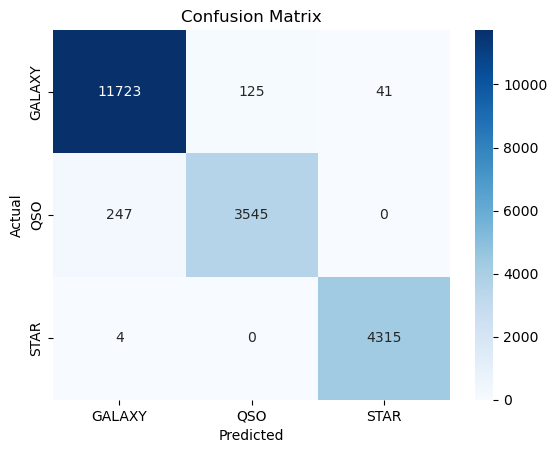

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

# Load the dataset
data = pd.read_csv(r"C:\Users\Ayush Pandita\OneDrive\Desktop\YR 3 SEM 6\AOML\ASS2\StarClassificationDataset.csv")

# Checking the dataset
print(data.head())

# Define features and target
X = data.drop(columns=["class"])
y = data["class"]

# Convert non-numeric values to NaN and fill NaN values with the mean of the column
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean())

# Stratified splitting
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [4]:
# Findings
print("Findings:")
print("1. The overall classification accuracy is high (~98%).")
print("2. The 'STAR' class has perfect recall, meaning all actual stars were correctly classified.")
print("3. The 'QSO' class has the most misclassifications, often being confused with 'GALAXY'.")
print("4. Feature engineering or hyperparameter tuning could improve 'QSO' recall.")


Findings:
1. The overall classification accuracy is high (~98%).
2. The 'STAR' class has perfect recall, meaning all actual stars were correctly classified.
3. The 'QSO' class has the most misclassifications, often being confused with 'GALAXY'.
4. Feature engineering or hyperparameter tuning could improve 'QSO' recall.
